Lambert Scattering (irrad_method='horvat')
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.2 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.2,<2.3"

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.ipynb) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger('error')

b = phoebe.default_binary()

Relevant Parameters
---------------------------------

For parameters that affect reflection and heating (irrad_frac_\*) see the tutorial on [reflection and heating](./reflection_heating.ipynb).

The 'irrad_method' compute option dictates whether irradiation is handled according to the new Horvat scheme which includes Lambert Scattering, Wilson's original reflection scheme, or ignored entirely.

In [3]:
print(b['irrad_method'])

Parameter: irrad_method@phoebe01@compute
                       Qualifier: irrad_method
                     Description: Which method to use to handle all irradiation effects (reflection, redistribution)
                           Value: horvat
                         Choices: none, wilson, horvat
                  Constrained by: 
                      Constrains: None
                      Related to: None



Influence on Light Curves (fluxes)
---------------------------------

Let's (roughtly) reproduce Figure 8 from [Prsa et al. 2016](http://phoebe-project.org/publications/2016Prsa+) which shows the difference between Wilson and Horvat schemes for various inclinations.

<img src="prsa+2016_fig8.png" alt="Figure 8" width="600px"/>

First we'll roughly create a A0-K0 binary and set reasonable albedos.

In [4]:
b['teff@primary'] = 11000
b['requiv@primary'] = 2.5
b['gravb_bol@primary'] = 1.0

b['teff@secondary'] = 5000
b['requiv@secondary'] = 0.85

b['q@binary'] = 0.8/3.0

b.flip_constraint('mass@primary', solve_for='sma@binary')
b['mass@primary'] = 3.0

In [5]:
print(b.filter(qualifier=['mass', 'requiv', 'teff'], context='component'))

ParameterSet: 6 parameters
        requiv@primary@component: 2.5 solRad
          teff@primary@component: 11000.0 K
          mass@primary@component: 3.0 solMass
      requiv@secondary@component: 0.85 solRad
        teff@secondary@component: 5000.0 K
*       mass@secondary@component: 0.7999999999999998 solMass


In [6]:
b['irrad_frac_refl_bol@primary'] = 1.0
b['irrad_frac_refl_bol@secondary'] = 0.6

We'll also disable any eclipsing effects.

In [7]:
b['eclipse_method'] = 'only_horizon'

Now we'll compute the light curves with wilson and horvat irradiation, and plot the relative differences between the two as a function of phase, for several different values of the inclination.

In [8]:
phases = phoebe.linspace(0,1,101)
b.add_dataset('lc', times=b.to_time(phases))

<ParameterSet: 43 parameters | contexts: dataset, figure, compute, constraint>

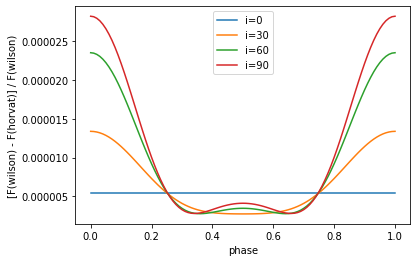

In [9]:
for incl in [0,30,60,90]:
    b.set_value('incl@binary', incl)
    b.run_compute(irrad_method='wilson')
    fluxes_wilson = b.get_value('fluxes', context='model')
    b.run_compute(irrad_method='horvat')
    fluxes_horvat = b.get_value('fluxes', context='model')
    plt.plot(phases, (fluxes_wilson-fluxes_horvat)/fluxes_wilson, label='i={}'.format(incl))
    
plt.xlabel('phase')
plt.ylabel('[F(wilson) - F(horvat)] / F(wilson)')
plt.legend(loc='upper center')
plt.show()